In [24]:
BASE_DIR="output_0717/"
BGL="BGL_clusters2.csv"
Thunderbird="Thunderbird_clusters2.csv"

In [25]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [26]:
BGL=pd.read_csv(BASE_DIR+BGL)

In [27]:
Thunder=pd.read_csv(BASE_DIR+Thunderbird)

In [29]:
print(Thunder['cluster2'].value_counts())
print(BGL['cluster2'].value_counts())

2    271028
1     26161
3     12921
0      7904
4      6165
5      5821
Name: cluster2, dtype: int64
1     24865
5      5733
8      4758
2      4647
6      4111
3      3958
4      3943
7      2968
23     2807
11     2286
0      2031
12     1369
15     1369
13     1084
24     1000
17     1000
10      972
19      887
26      794
9       781
21      763
25      707
22      654
14      593
28      593
29      542
16      531
18      512
20      486
27      256
Name: cluster2, dtype: int64


In [33]:
def plot_proportions(df,cluster_col,label_col,data):
    
    cluster_labels=df[cluster_col].values
    anomaly_labels=df[label_col].values
    
    # Count the occurrences of each cluster
    cluster_counts = np.bincount(cluster_labels)

    # Initialize lists to store the proportions
    anomaly_proportions = []
    normal_proportions = []

    # Calculate the proportions of anomalies and normal points per cluster
    for cluster in range(max(cluster_labels) + 1):
        cluster_mask = np.array(cluster_labels) == cluster
        anomaly_count = np.sum(np.array(anomaly_labels)[cluster_mask] == 1)
        normal_count = cluster_counts[cluster] - anomaly_count
        total_count = cluster_counts[cluster]

        anomaly_proportion = anomaly_count / total_count
        normal_proportion = normal_count / total_count

        anomaly_proportions.append(anomaly_proportion)
        normal_proportions.append(normal_proportion)

    plt.figure(figsize=(8, 4))
    # Plot the stacked bar chart with grey and red colors, wider bars, and labels 
    #for all x-values
    clusters = range(max(cluster_labels) + 1)
    plt.bar(clusters, anomaly_proportions, color='#ff474c', label='Anomalies', width=0.8)
    plt.bar(clusters, normal_proportions, bottom=anomaly_proportions, color='#D3D3D3',
        label='Normal', width=0.8)

    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.title('Proportion of Anomalous Logs to Normal Logs per Cluster in {}'.format(data))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Move the legend outside the plot

    # Label all x-values
    plt.xticks(clusters)
    plt.savefig('{}.png'.format(data))

    return plt.show()

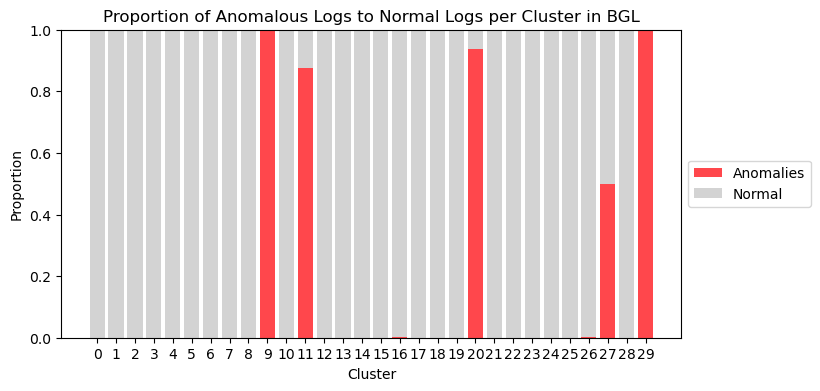

In [34]:
df= BGL
cluster_col='cluster2'
label_col='label'
data="BGL"
plot_proportions(df,cluster_col,label_col,data)

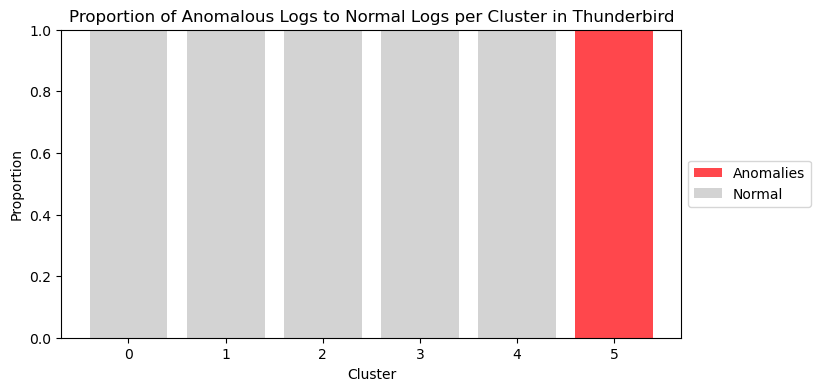

In [35]:
df= Thunder
cluster_col='cluster2'
label_col='label'
data="Thunderbird"
plot_proportions(df,cluster_col,label_col,data)